# Data Integration & Preprocessing

In [67]:
import pandas as pd

## Loading Datasets

In [68]:
daily_activity = pd.read_csv('dailyActivity.csv')
daily_calories = pd.read_csv('dailyCalories.csv')
daily_steps = pd.read_csv('dailySteps.csv')
sleep_day = pd.read_csv('sleepDay.csv')

In [69]:
print("Daily Activity Columns:", daily_activity.columns)
print("Daily Calories Columns:", daily_calories.columns)
print("Daily Steps Columns:", daily_steps.columns)
print("Sleep Day Columns:", sleep_day.columns)

Daily Activity Columns: Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')
Daily Calories Columns: Index(['Id', 'ActivityDay', 'Calories'], dtype='object')
Daily Steps Columns: Index(['Id', 'ActivityDay', 'StepTotal'], dtype='object')
Sleep Day Columns: Index(['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed'],
      dtype='object')


## Data Integration

In [70]:
merged_data = pd.merge(daily_activity, daily_calories, on=['Id'], how='outer')

merged_data = pd.merge(merged_data, daily_steps, on=['Id'], how='outer')

sleep_day['SleepDay'] = pd.to_datetime(sleep_day['SleepDay']).dt.date
merged_data['ActivityDate'] = pd.to_datetime(merged_data['ActivityDate']).dt.date
merged_data = pd.merge(merged_data, sleep_day, left_on=['Id'], right_on=['Id'], how='outer')


In [71]:
merged_data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,SedentaryMinutes,Calories_x,ActivityDay_x,Calories_y,ActivityDay_y,StepTotal,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,728,1985,4/12/2016,1985,4/12/2016,13162,2016-04-12,1.0,327.0,346.0
1,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,728,1985,4/12/2016,1985,4/12/2016,13162,2016-04-13,2.0,384.0,407.0
2,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,728,1985,4/12/2016,1985,4/12/2016,13162,2016-04-15,1.0,412.0,442.0
3,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,728,1985,4/12/2016,1985,4/12/2016,13162,2016-04-16,2.0,340.0,367.0
4,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,728,1985,4/12/2016,1985,4/12/2016,13162,2016-04-17,1.0,700.0,712.0


In [72]:
merged_data.drop(columns=['Calories_y'], inplace=True)

merged_data.rename(columns={'Calories_x': 'Calories'}, inplace=True)


## Basic Preprocessing

In [73]:
merged_data.fillna(0, inplace=True)

merged_data['ActivityDate'] = pd.to_datetime(merged_data['ActivityDate'])

# Exploratory Data Analysis (EDA)

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
data = pd.DataFrame(merged_data)

In [76]:
print(data.describe())

                 Id    TotalSteps  TotalDistance  TrackerDistance  \
count  1.168748e+07  1.168748e+07   1.168748e+07     1.168748e+07   
mean   5.040404e+09  8.138263e+03   5.758089e+00     5.751516e+00   
std    2.057397e+09  4.472531e+03   3.261958e+00     3.255098e+00   
min    1.503960e+09  0.000000e+00   0.000000e+00     0.000000e+00   
25%    4.020333e+09  4.676000e+03   3.180000e+00     3.180000e+00   
50%    4.702922e+09  8.585000e+03   6.120000e+00     6.120000e+00   
75%    6.962181e+09  1.131700e+04   7.960000e+00     7.920000e+00   
max    8.877689e+09  3.601900e+04   2.803000e+01     2.803000e+01   

       LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
count              1.168748e+07        1.168748e+07              1.168748e+07   
mean               1.233320e-01        1.420570e+00              7.229792e-01   
std                5.480332e-01        1.964798e+00              1.024669e+00   
min                0.000000e+00        0.000000e+00   

## Distribution of Key Metrics

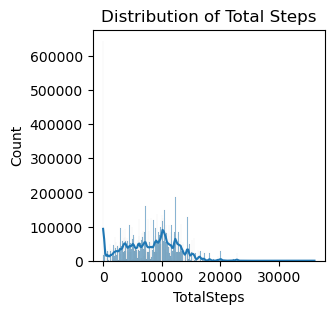

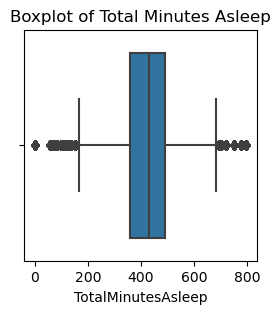

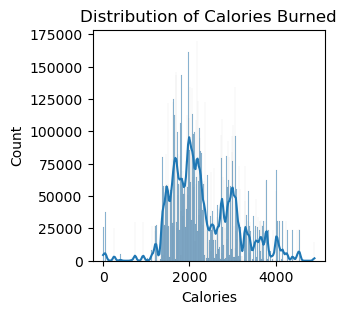

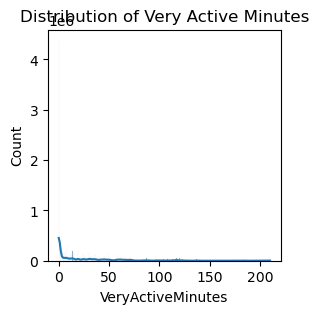

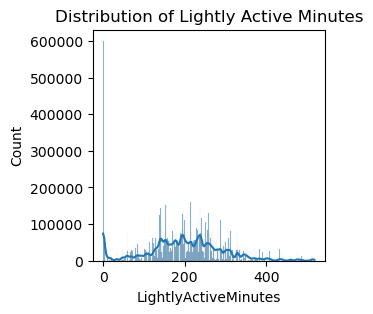

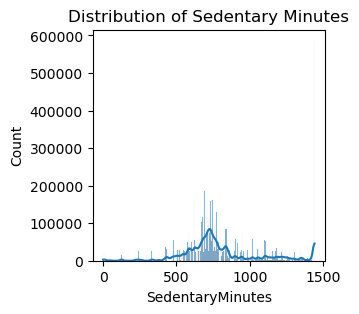

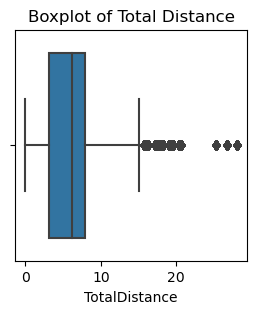

In [77]:
plt.figure(figsize=(3, 3))
sns.histplot(data['TotalSteps'], kde=True)
plt.title('Distribution of Total Steps')
plt.show()

plt.figure(figsize=(3,3))
sns.boxplot(x=data['TotalMinutesAsleep'])
plt.title('Boxplot of Total Minutes Asleep')
plt.show()

plt.figure(figsize=(3, 3))
sns.histplot(data['Calories'], kde=True)
plt.title('Distribution of Calories Burned')
plt.show()

plt.figure(figsize=(3,3))
sns.histplot(data['VeryActiveMinutes'], kde=True)
plt.title('Distribution of Very Active Minutes')
plt.show()

plt.figure(figsize=(3,3))
sns.histplot(data['LightlyActiveMinutes'], kde=True)
plt.title('Distribution of Lightly Active Minutes')
plt.show()

plt.figure(figsize=(3,3))
sns.histplot(data['SedentaryMinutes'], kde=True)
plt.title('Distribution of Sedentary Minutes')
plt.show()

plt.figure(figsize=(3,3))
sns.boxplot(x=data['TotalDistance'])
plt.title('Boxplot of Total Distance')
plt.show()



## Correlation Analysis

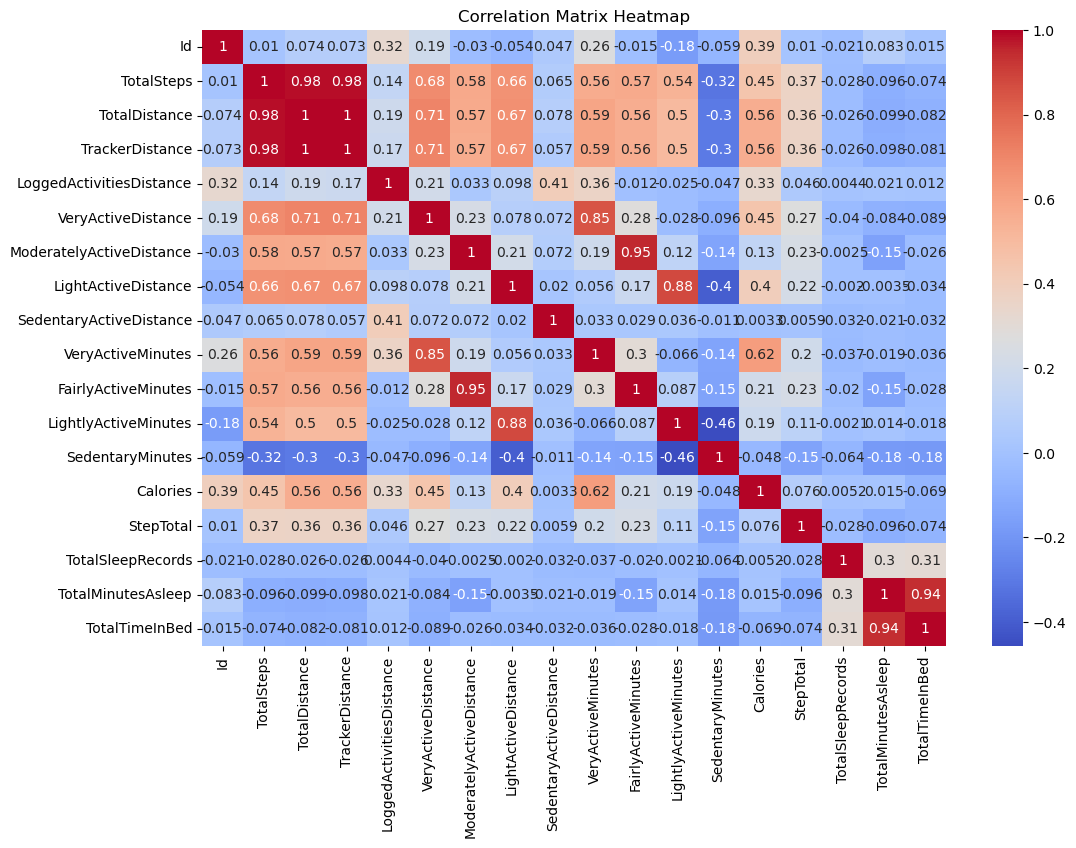

In [78]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

## Pairwise Relationships

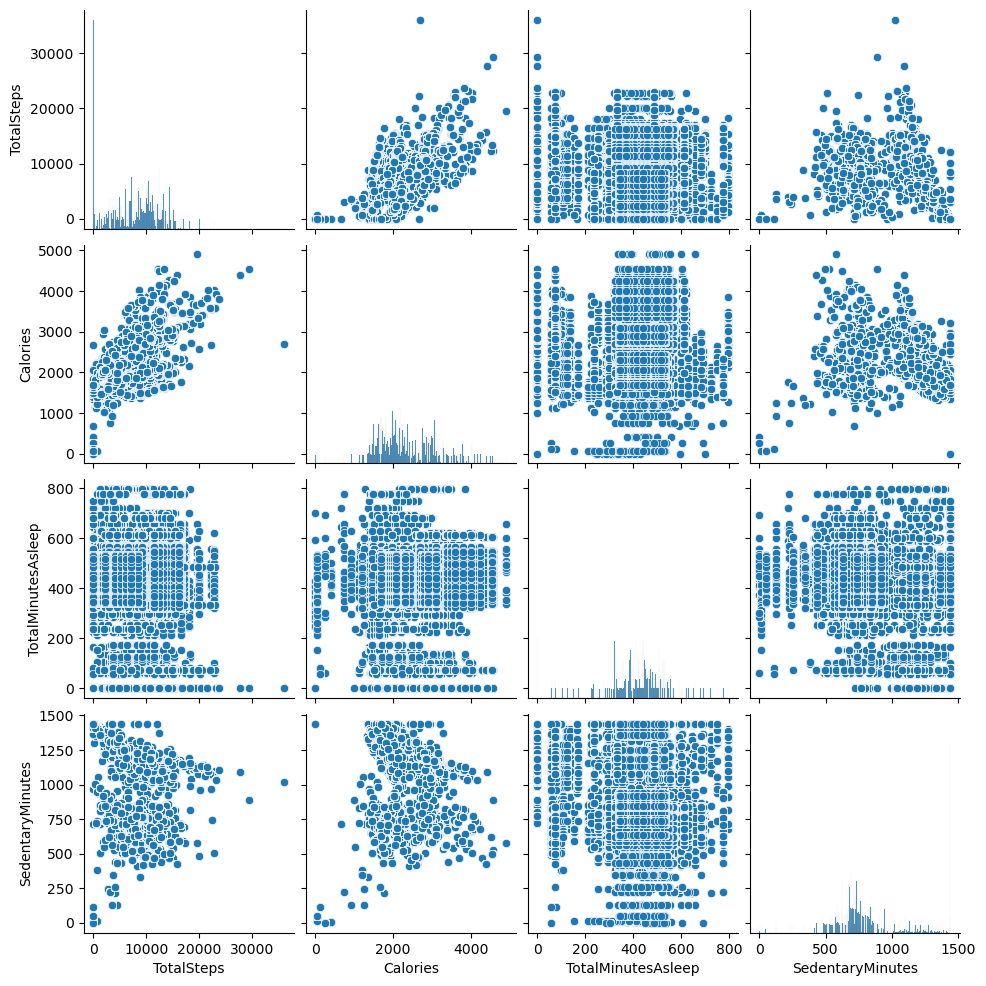

In [79]:
sns.pairplot(data[['TotalSteps', 'Calories', 'TotalMinutesAsleep', 'SedentaryMinutes']])
plt.show()

# Algorithm Development

In [80]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## Feature Selection and Data Splitting

In [81]:
features = data[['TotalSteps', 'Calories', 'VeryActiveMinutes', 'SedentaryMinutes']]

target = data['TotalMinutesAsleep']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=100)


## Model Training

In [82]:
model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

## Model Evaluation

In [83]:
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Coefficient of Determination (R^2):", r2_score(y_test, y_pred))

Mean Squared Error: 15539.309073587961
Coefficient of Determination (R^2): 0.06817612623882274
